# Sparse coding

This will also layout the groundwork for the Redundant Collective Perception Service (RCPS) that dials down the network transmission

## Load the trajectory data, as usual

In [2]:
import numpy as np
import pickle 
from matplotlib import pyplot as plt 
trajectory_file = open("trajectories.pyo", "rb")
trajs = pickle.load(trajectory_file)
y_vec = np.array(trajs['y_vec'])
t_vec = np.array(trajs['t_vec'])
del trajs
trajectory_file.close()
del trajectory_file

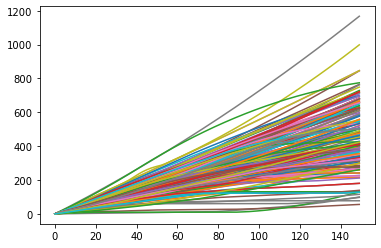

In [5]:
for traj in range(y_vec.shape[0]):
    plt.plot(y_vec[traj])

This is the sample trajectory dataset

## Dictionary learning

In [7]:
from sklearn.decomposition import DictionaryLearning
dicc = DictionaryLearning(n_components=100, alpha=1, max_iter=1000)
dicc_components = dicc.fit(y_vec).components_

Dictionary elements

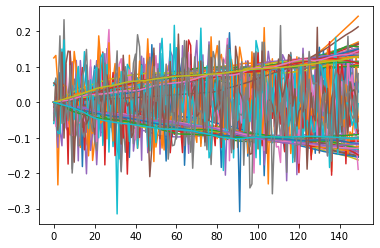

In [10]:
for i in range(dicc_components.shape[0]):
    plt.plot(dicc_components[i])

Time to test the coded sample trajectories

In [17]:
dicc.set_params(transform_algorithm='omp', transform_n_nonzero_coefs=1)
code = dicc.transform(y_vec[3].copy().reshape(-1,1).transpose())
code

array([[   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        , 2636.02469949,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.     

Let's reconstruct

In [20]:
reconstruct = np.dot(code, dicc.components_)

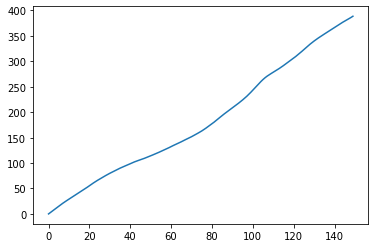

In [23]:
plt.plot(reconstruct.transpose())

In [24]:
synth1 = np.load('synth1.npz')['data']
synth2 = np.load('synth2.npz')['data']

In [49]:
dicc.set_params(transform_algorithm='omp', transform_n_nonzero_coefs=5)
code_s1 = dicc.transform(synth1.reshape(-1,1).transpose())
code_s1

array([[    0.        ,   794.6715975 ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,    11.00018178,     0.  

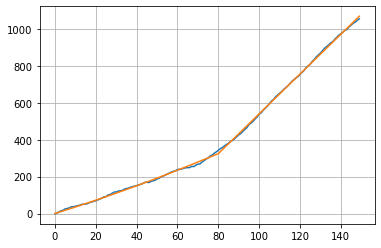

In [50]:
reconstruct_s1 = np.dot(code_s1, dicc.components_).transpose()
plt.plot(reconstruct_s1)
plt.plot(synth1.reshape((-1,1)))
plt.grid(True)

(array([ 3.,  8., 14., 19., 33., 37., 26.,  5.,  3.,  2.]),
 array([-16.03144882, -12.61857772,  -9.20570662,  -5.79283552,
         -2.37996442,   1.03290668,   4.44577778,   7.85864888,
         11.27151998,  14.68439108,  18.09726218]),
 <BarContainer object of 10 artists>)

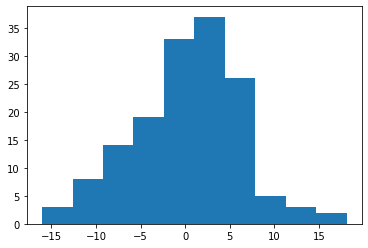

In [52]:
plt.hist(reconstruct_s1 - synth1.reshape((-1,1)))